# Xarray.  Введение. Концептуальное сходство pandas и xarray.

## Xarray - разработка комьюнити [pydata](https://pydata.org), нацеленная на обработку многомерных данных с несколькими привязками

Работает с netcdf главным образом через низкоуровневую библиотеку netCDF4, но этим не ограничевается

Работаем с массивом аномалий температуры Гадлей центра (netcdf файл). Скачать можно [здесь](https://mega.nz/#!C0tDSKwJ!kWaLb9qzYT5MpFqayG_VGiJhcWfSZ_FcFa55DCvaSx4)

In [1]:
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
!ncdump -h /mnt/WORK2/Data/HadCRUT4/HadCRUT.4.6.0.0.median.nc

netcdf HadCRUT.4.6.0.0.median {
dimensions:
	latitude = 36 ;
	longitude = 72 ;
	field_status_string_length = 1 ;
	time = UNLIMITED ; // (2027 currently)
variables:
	float latitude(latitude) ;
		latitude:standard_name = "latitude" ;
		latitude:long_name = "latitude" ;
		latitude:point_spacing = "even" ;
		latitude:units = "degrees_north" ;
		latitude:axis = "Y" ;
	float longitude(longitude) ;
		longitude:standard_name = "longitude" ;
		longitude:long_name = "longitude" ;
		longitude:point_spacing = "even" ;
		longitude:units = "degrees_east" ;
		longitude:axis = "X" ;
	float time(time) ;
		time:standard_name = "time" ;
		time:long_name = "time" ;
		time:units = "days since 1850-1-1 00:00:00" ;
		time:calendar = "gregorian" ;
		time:start_year = 1850s ;
		time:end_year = 2018s ;
		time:start_month = 1s ;
		time:end_month = 11s ;
		time:axis = "T" ;
	float temperature_anomaly(time, latitude, longitude) ;
		temperature_anomaly:long_name = "near_surface_temperature_anomaly" ;
		temperature_

In [3]:
data = xr.open_dataset('/mnt/WORK2/Data/HadCRUT4/HadCRUT.4.6.0.0.median.nc')

In [4]:
data.info()

xarray.Dataset {
dimensions:
	latitude = 36 ;
	longitude = 72 ;
	time = 2027 ;

variables:
	float32 latitude(latitude) ;
		latitude:standard_name = latitude ;
		latitude:long_name = latitude ;
		latitude:point_spacing = even ;
		latitude:units = degrees_north ;
		latitude:axis = Y ;
	float32 longitude(longitude) ;
		longitude:standard_name = longitude ;
		longitude:long_name = longitude ;
		longitude:point_spacing = even ;
		longitude:units = degrees_east ;
		longitude:axis = X ;
	datetime64[ns] time(time) ;
		time:standard_name = time ;
		time:long_name = time ;
		time:start_year = 1850 ;
		time:end_year = 2018 ;
		time:start_month = 1 ;
		time:end_month = 11 ;
		time:axis = T ;
	float32 temperature_anomaly(time, latitude, longitude) ;
		temperature_anomaly:long_name = near_surface_temperature_anomaly ;
		temperature_anomaly:units = K ;
		temperature_anomaly:reference_period = [1961 1990] ;
	|S1 field_status(time) ;
		field_status:long_name = field_status ;

// global attributes:
	:ti

In [5]:
data

<xarray.Dataset>
Dimensions:              (latitude: 36, longitude: 72, time: 2027)
Coordinates:
  * latitude             (latitude) float32 -87.5 -82.5 -77.5 ... 77.5 82.5 87.5
  * longitude            (longitude) float32 -177.5 -172.5 ... 172.5 177.5
  * time                 (time) datetime64[ns] 1850-01-16T12:00:00 ... 2018-11-16
Data variables:
    temperature_anomaly  (time, latitude, longitude) float32 ...
    field_status         (time) |S1 ...
Attributes:
    title:                  HadCRUT4 near-surface temperature ensemble data -...
    institution:            Met Office Hadley Centre / Climatic Research Unit...
    history:                Updated at 19/12/2018 16:42:18
    source:                 CRUTEM.4.6.0.0, HadSST.3.1.1.0
    comment:                
    reference:              Morice, C. P., J. J. Kennedy, N. A. Rayner, and P...
    version:                HadCRUT.4.6.0.0
    Conventions:            CF-1.0
    ensemble_members:       100
    ensemble_member_index:  0

In [6]:
plt.rcParams.update({'figure.dpi':150,'savefig.dpi':150,'savefig.bbox':'tight'})

In [7]:
plt.style.use('ggplot')

## Срез и визуализация данных

Индекс это индекс даты/времени. Это очень важно!

Понятие индексов!

In [8]:
data.indexes

latitude: Float64Index([-87.5, -82.5, -77.5, -72.5, -67.5, -62.5, -57.5, -52.5, -47.5,
                        -42.5, -37.5, -32.5, -27.5, -22.5, -17.5, -12.5,  -7.5,  -2.5,
                          2.5,   7.5,  12.5,  17.5,  22.5,  27.5,  32.5,  37.5,  42.5,
                         47.5,  52.5,  57.5,  62.5,  67.5,  72.5,  77.5,  82.5,  87.5],
                       dtype='float64', name='latitude')
longitude: Float64Index([-177.5, -172.5, -167.5, -162.5, -157.5, -152.5, -147.5, -142.5,
                         -137.5, -132.5, -127.5, -122.5, -117.5, -112.5, -107.5, -102.5,
                          -97.5,  -92.5,  -87.5,  -82.5,  -77.5,  -72.5,  -67.5,  -62.5,
                          -57.5,  -52.5,  -47.5,  -42.5,  -37.5,  -32.5,  -27.5,  -22.5,
                          -17.5,  -12.5,   -7.5,   -2.5,    2.5,    7.5,   12.5,   17.5,
                           22.5,   27.5,   32.5,   37.5,   42.5,   47.5,   52.5,   57.5,
                           62.5,   67.5,   72.5,   77.5,   8

In [9]:
data['temperature_anomaly']

<xarray.DataArray 'temperature_anomaly' (time: 2027, latitude: 36, longitude: 72)>
[5253984 values with dtype=float32]
Coordinates:
  * latitude   (latitude) float32 -87.5 -82.5 -77.5 -72.5 ... 77.5 82.5 87.5
  * longitude  (longitude) float32 -177.5 -172.5 -167.5 ... 167.5 172.5 177.5
  * time       (time) datetime64[ns] 1850-01-16T12:00:00 ... 2018-11-16
Attributes:
    long_name:         near_surface_temperature_anomaly
    units:             K
    reference_period:  [1961 1990]

Для формирования сечений тоже можно использовать индексы. Например,

In [10]:
data['temperature_anomaly'][0]

<xarray.DataArray 'temperature_anomaly' (latitude: 36, longitude: 72)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)
Coordinates:
  * latitude   (latitude) float32 -87.5 -82.5 -77.5 -72.5 ... 77.5 82.5 87.5
  * longitude  (longitude) float32 -177.5 -172.5 -167.5 ... 167.5 172.5 177.5
    time       datetime64[ns] 1850-01-16T12:00:00
Attributes:
    long_name:         near_surface_temperature_anomaly
    units:             K
    reference_period:  [1961 1990]

Более правильная индексация (применима и к DataSet тоже)

In [11]:
data['temperature_anomaly'].isel(longitude=10)

<xarray.DataArray 'temperature_anomaly' (time: 2027, latitude: 36)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)
Coordinates:
  * latitude   (latitude) float32 -87.5 -82.5 -77.5 -72.5 ... 77.5 82.5 87.5
    longitude  float32 -127.5
  * time       (time) datetime64[ns] 1850-01-16T12:00:00 ... 2018-11-16
Attributes:
    long_name:         near_surface_temperature_anomaly
    units:             K
    reference_period:  [1961 1990]

In [12]:
data['temperature_anomaly'].isel(longitude=20,time=500)

<xarray.DataArray 'temperature_anomaly' (latitude: 36)>
array([      nan,       nan,       nan,       nan,       nan,       nan,
        0.108813, -0.047952,  0.007201, -0.842816, -0.070317, -0.579523,
       -0.944073, -0.360339,       nan,       nan,       nan, -0.267767,
             nan,       nan,       nan,  0.596271, -0.478932, -0.256182,
       -0.139295, -0.014693,  1.946358,  2.067549,       nan,       nan,
             nan,       nan,       nan,       nan,       nan,       nan],
      dtype=float32)
Coordinates:
  * latitude   (latitude) float32 -87.5 -82.5 -77.5 -72.5 ... 77.5 82.5 87.5
    longitude  float32 -77.5
    time       datetime64[ns] 1891-09-16
Attributes:
    long_name:         near_surface_temperature_anomaly
    units:             K
    reference_period:  [1961 1990]

Здесь мы оперируем непостредственно индексами - целыми числами.

Для выбора диапазона удобно использовать функцию slice()

In [13]:
data['temperature_anomaly'].isel(longitude=20,time=slice(10,50))

<xarray.DataArray 'temperature_anomaly' (time: 40, latitude: 36)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)
Coordinates:
  * latitude   (latitude) float32 -87.5 -82.5 -77.5 -72.5 ... 77.5 82.5 87.5
    longitude  float32 -77.5
  * time       (time) datetime64[ns] 1850-11-16 ... 1854-02-15
Attributes:
    long_name:         near_surface_temperature_anomaly
    units:             K
    reference_period:  [1961 1990]

Xarray также использует matplotlib в качестве библиотеки визуализации. Сравните с предыдущим уроком.

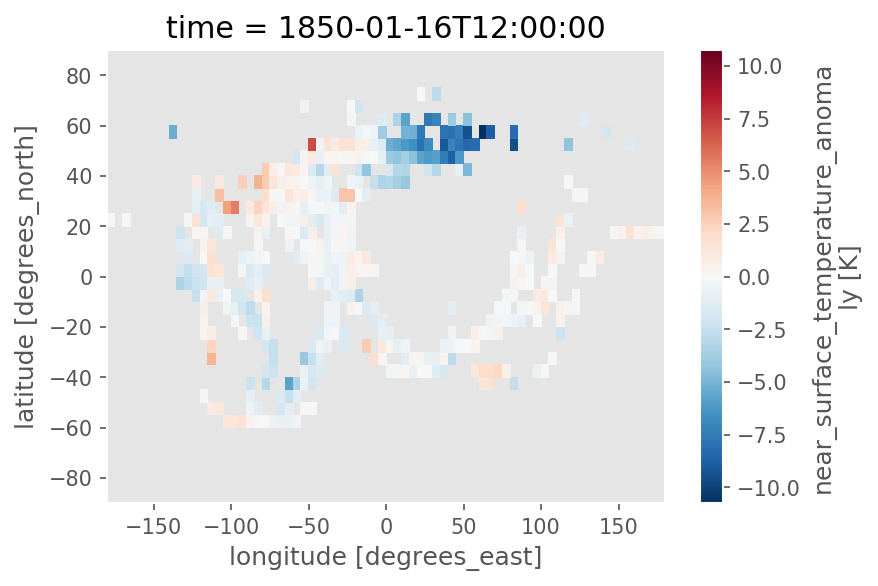

In [14]:
data['temperature_anomaly'][0].plot()

Фиксирование времени даёт 2-мерное сечение. Зафиксируем широту и долготу:

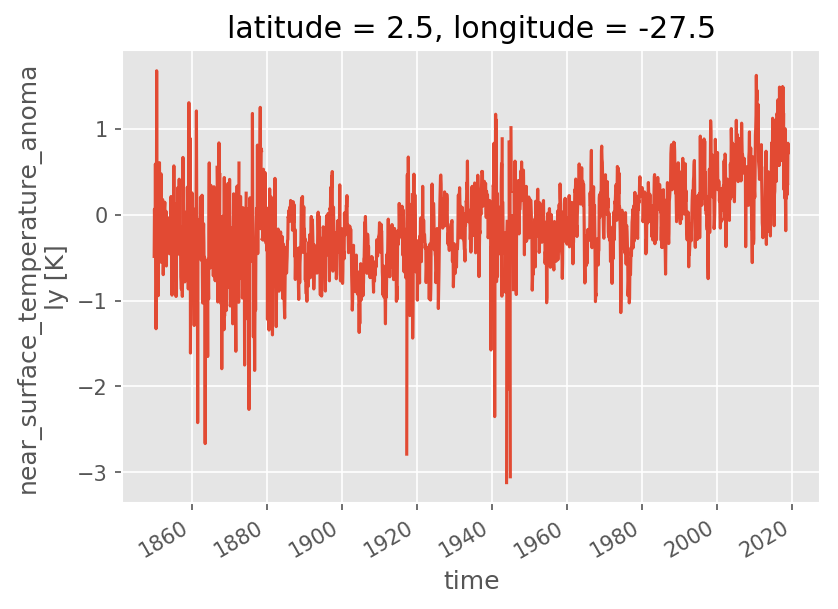

In [15]:
data['temperature_anomaly'].isel(longitude=30,latitude=18).plot()

Основная фича: формирование более сечений более "естественными запросами". Например, нужен район от -30 до 180 в.д., от -50 до 50 с.ш., с 1958 года

In [65]:
region = data['temperature_anomaly'].sel(latitude=slice(-50.,50.),longitude=slice(-30,180),time=slice('1958','2018'))

In [66]:
region.longitude.values

array([-27.5, -22.5, -17.5, -12.5,  -7.5,  -2.5,   2.5,   7.5,  12.5,
        17.5,  22.5,  27.5,  32.5,  37.5,  42.5,  47.5,  52.5,  57.5,
        62.5,  67.5,  72.5,  77.5,  82.5,  87.5,  92.5,  97.5, 102.5,
       107.5, 112.5, 117.5, 122.5, 127.5, 132.5, 137.5, 142.5, 147.5,
       152.5, 157.5, 162.5, 167.5, 172.5, 177.5], dtype=float32)

In [67]:
region.latitude.values

array([-47.5, -42.5, -37.5, -32.5, -27.5, -22.5, -17.5, -12.5,  -7.5,
        -2.5,   2.5,   7.5,  12.5,  17.5,  22.5,  27.5,  32.5,  37.5,
        42.5,  47.5], dtype=float32)

In [68]:
region.time.values[:5]

array(['1958-01-16T12:00:00.000000000', '1958-02-15T00:00:00.000000000',
       '1958-03-16T12:00:00.000000000', '1958-04-16T00:00:00.000000000',
       '1958-05-16T12:00:00.000000000'], dtype='datetime64[ns]')

Вспоминаем, что мы делали с dataframe в пандас...

Операции понижающие размерность.... mean,min,var,median etc.

Поскольку здесь индексов больше, то нужно явно указывать по какой размерности производим операцию

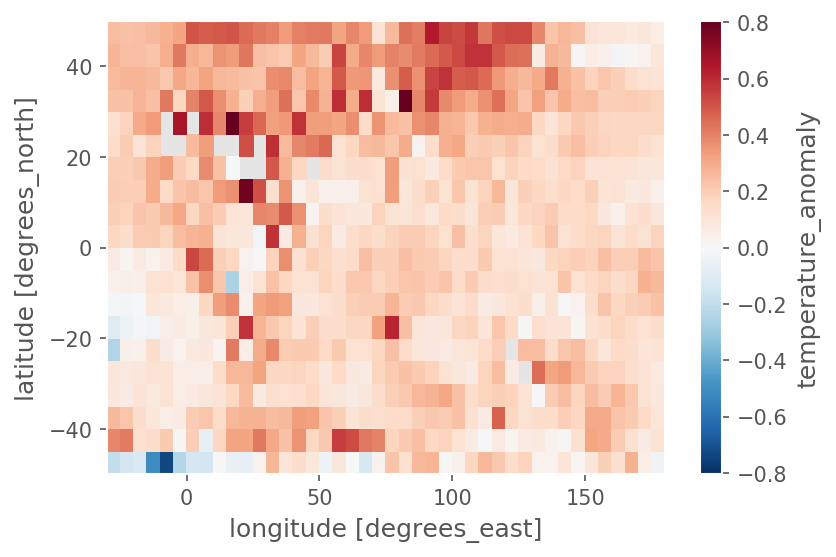

In [69]:
region.mean(dim='time').plot()

Если хочется считать больше чем по одной размерности, то указываем список

Text(0.5, 1.0, 'Среднее изменение вдоль широты')

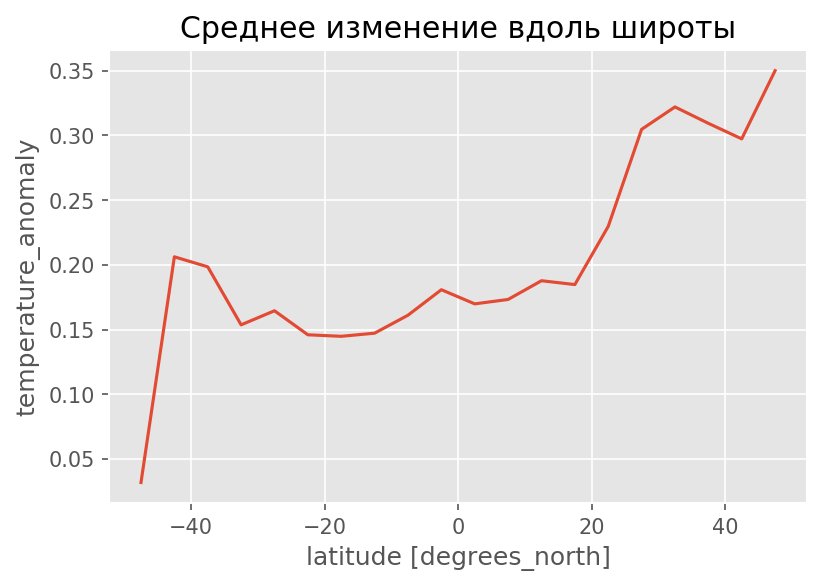

In [70]:
region.mean(dim=['time','longitude']).plot()
plt.title('Среднее изменение вдоль широты')

Text(0.5, 1.0, 'СКО аномалий вдоль широты')

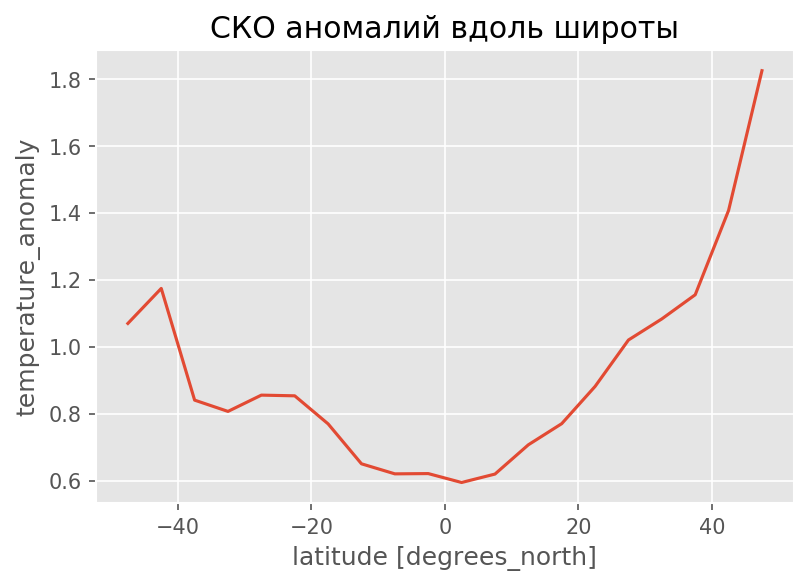

In [71]:
region.std(dim=['time','longitude']).plot()
plt.title('СКО аномалий вдоль широты')

При выборе "точного" индекса у нас могут быть проблемы

In [74]:
region.sel(longitude=-30).std(dim=['time']).plot()

KeyError: -30.0

Давайте посмотрим подробнее...

In [75]:
region.longitude

<xarray.DataArray 'longitude' (longitude: 42)>
array([-27.5, -22.5, -17.5, -12.5,  -7.5,  -2.5,   2.5,   7.5,  12.5,  17.5,
        22.5,  27.5,  32.5,  37.5,  42.5,  47.5,  52.5,  57.5,  62.5,  67.5,
        72.5,  77.5,  82.5,  87.5,  92.5,  97.5, 102.5, 107.5, 112.5, 117.5,
       122.5, 127.5, 132.5, 137.5, 142.5, 147.5, 152.5, 157.5, 162.5, 167.5,
       172.5, 177.5], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 -27.5 -22.5 -17.5 -12.5 ... 167.5 172.5 177.5
Attributes:
    standard_name:  longitude
    long_name:      longitude
    point_spacing:  even
    units:          degrees_east
    axis:           X

У нас действительно нет такого индека... Ищим ближайший 

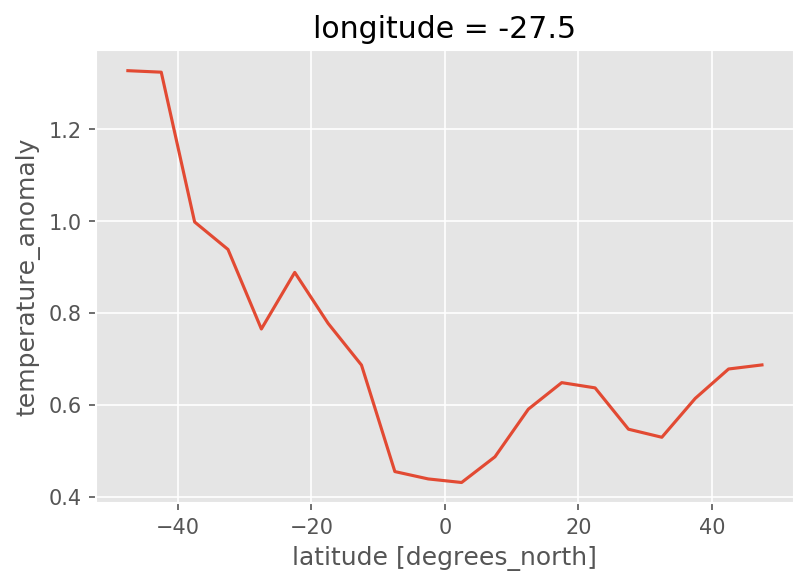

In [76]:
region.sel(longitude=-30,method='nearest').std(dim=['time']).plot()

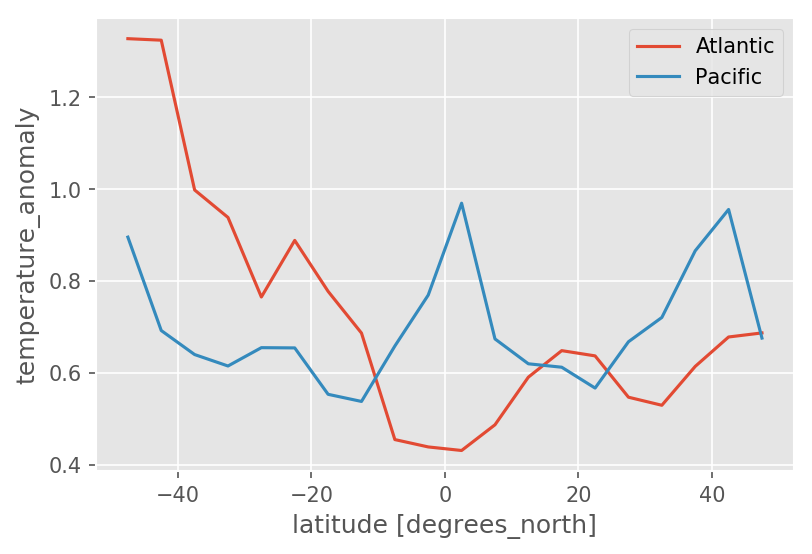

In [79]:
region.sel(longitude=-30,method='nearest').std(dim=['time']).plot(label='Atlantic')
region.sel(longitude=180,method='nearest').std(dim=['time']).plot(label='Pacific')
plt.title('')
plt.legend()

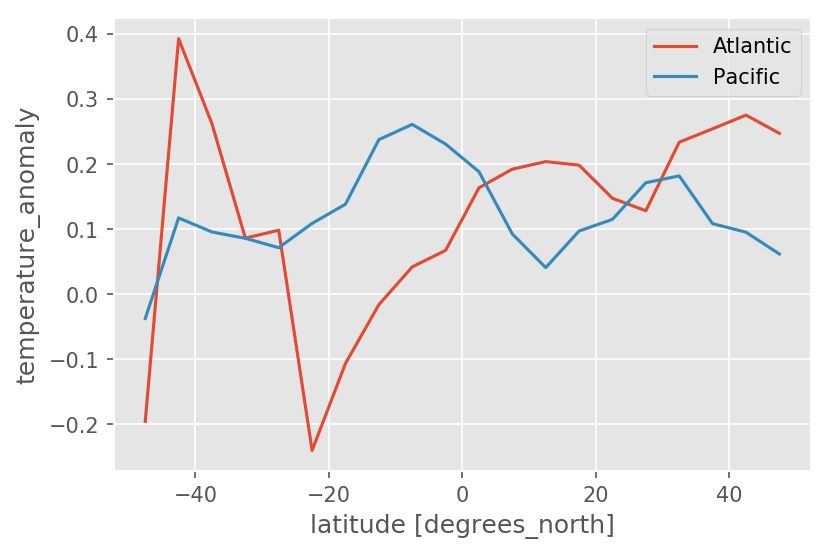

In [80]:
region.sel(longitude=-30,method='nearest').mean(dim=['time']).plot(label='Atlantic')
region.sel(longitude=180,method='nearest').mean(dim=['time']).plot(label='Pacific')
plt.title('')
plt.legend()

/opt/miniconda/envs/satocean/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1628: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


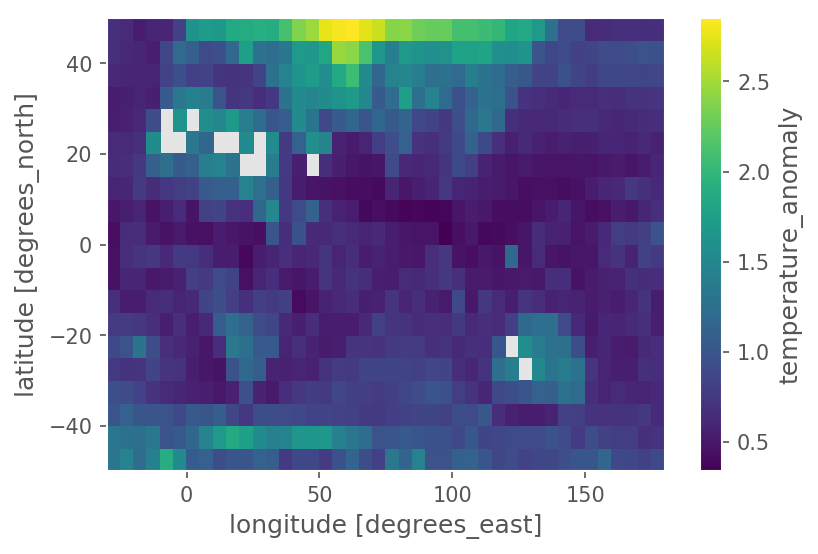

In [81]:
region.std(dim='time').plot()

Разберемся немного с визуализацией

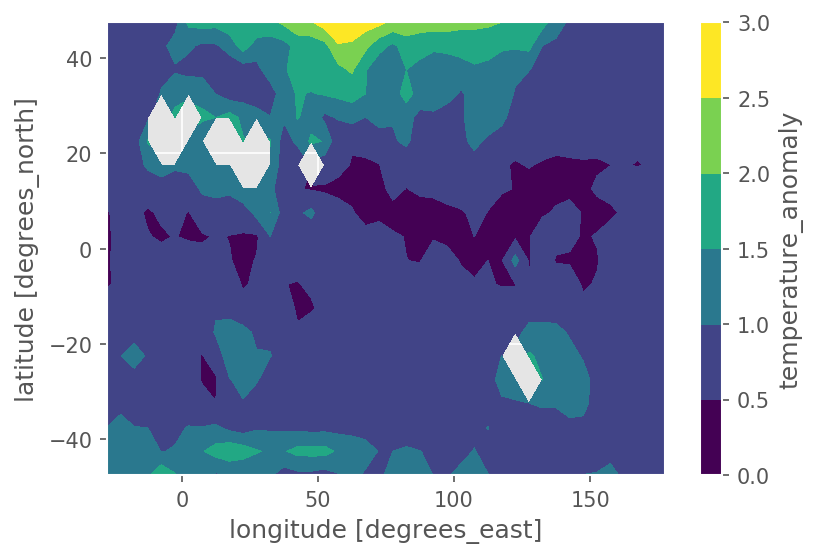

In [82]:
region.std(dim='time').plot.contourf()

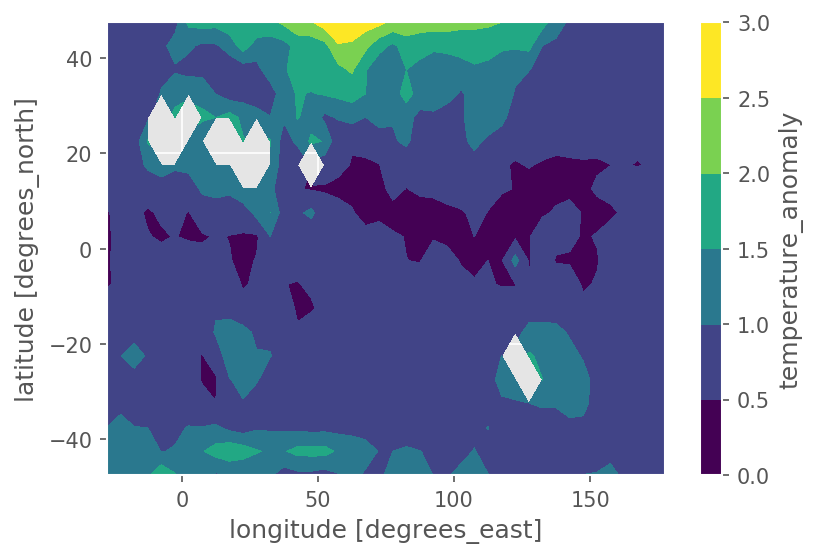

In [82]:
region.std(dim='time').plot.contourf()

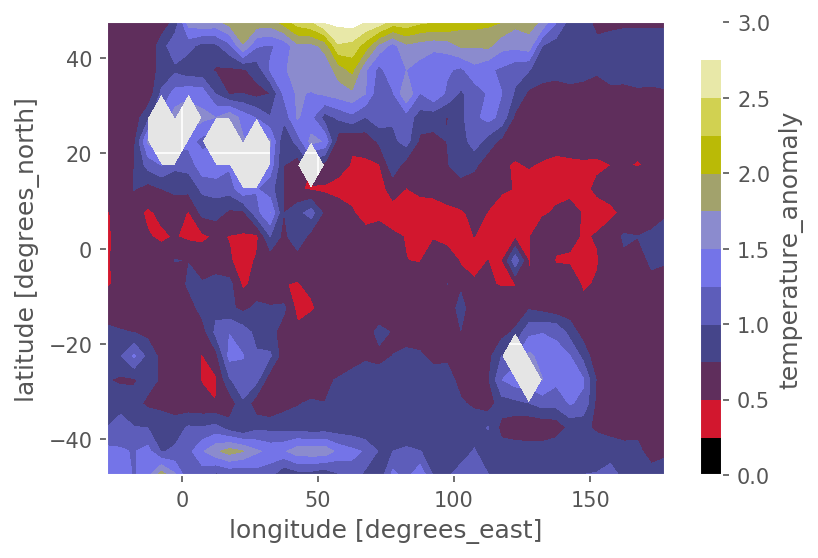

In [88]:
region.std(dim='time').plot.contourf(levels=np.arange(0.,3.25,0.25),cmap='gist_stern')

/opt/miniconda/envs/satocean/lib/python3.7/site-packages/xarray/core/nputils.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice.
  result = getattr(npmodule, name)(values, axis=axis, **kwds)


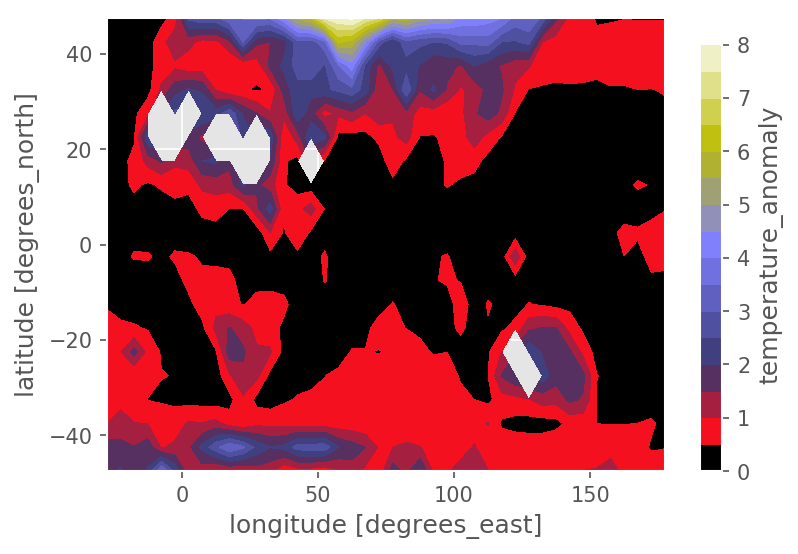

In [90]:
region.var(dim='time').plot.contourf(levels=20,cmap='gist_stern')

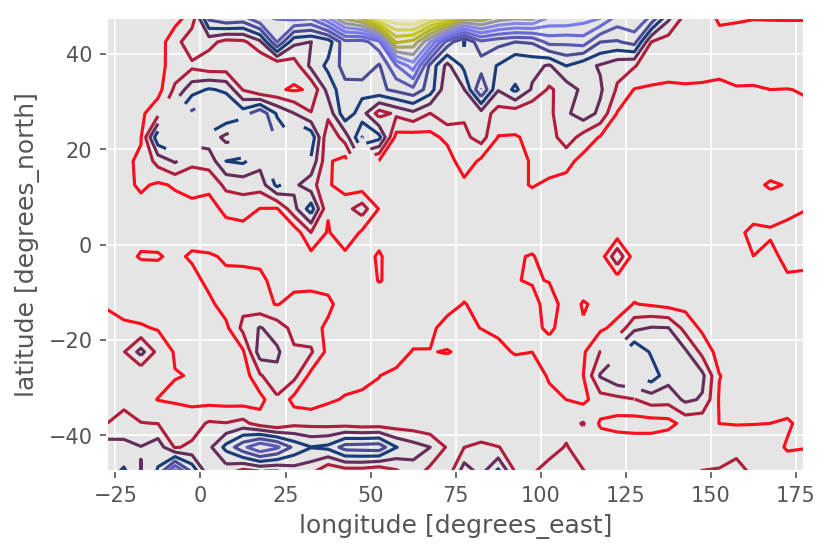

In [91]:
region.var(dim='time').plot.contour(levels=20,cmap='gist_stern')

(array([  1.,   1.,   0.,   9.,  35., 384., 279.,  82.,  33.,   4.]),
 array([-0.73413265, -0.5803285 , -0.42652446, -0.27272034, -0.11891625,
         0.03488785,  0.18869194,  0.34249604,  0.49630016,  0.6501042 ,
         0.80390835], dtype=float32),
 <a list of 10 Patch objects>)

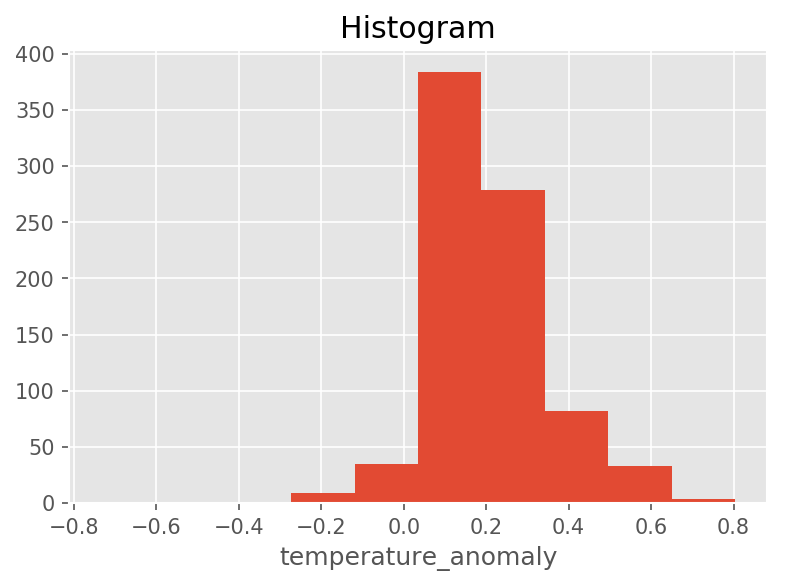

In [95]:
region.mean(dim='time').plot.hist()

(array([  3.,   9.,  33., 135., 394., 168.,  38.,  13.,   2.,   5.]),
 array([-4.2182126 , -3.2228124 , -2.2274122 , -1.232012  , -0.23661184,
         0.75878835,  1.7541885 ,  2.7495887 ,  3.744989  ,  4.740389  ,
         5.7357893 ], dtype=float32),
 <a list of 10 Patch objects>)

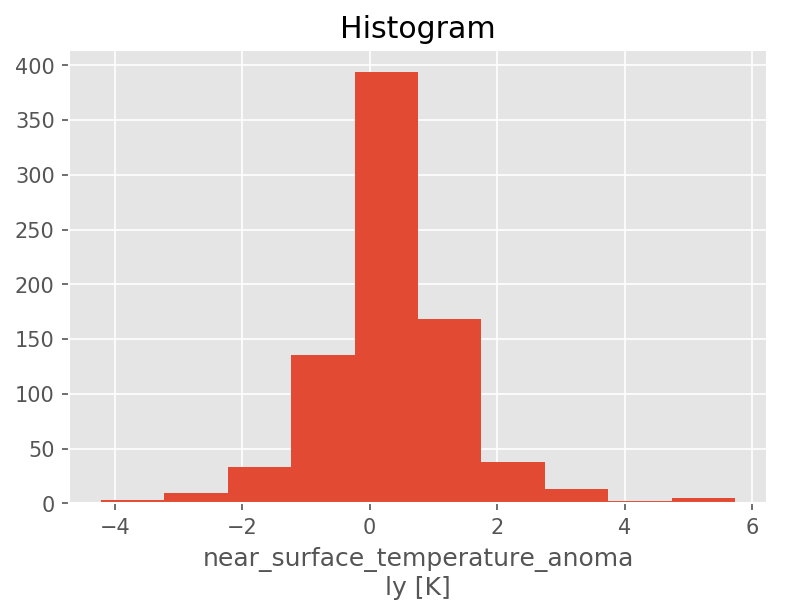

In [96]:
region.sel(time='2000-01').plot.hist()

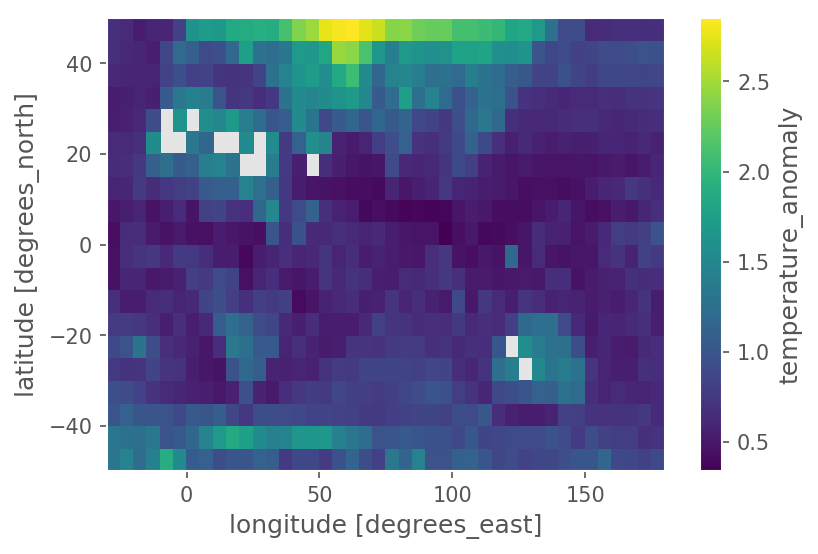

In [101]:
region.std(dim='time').plot()

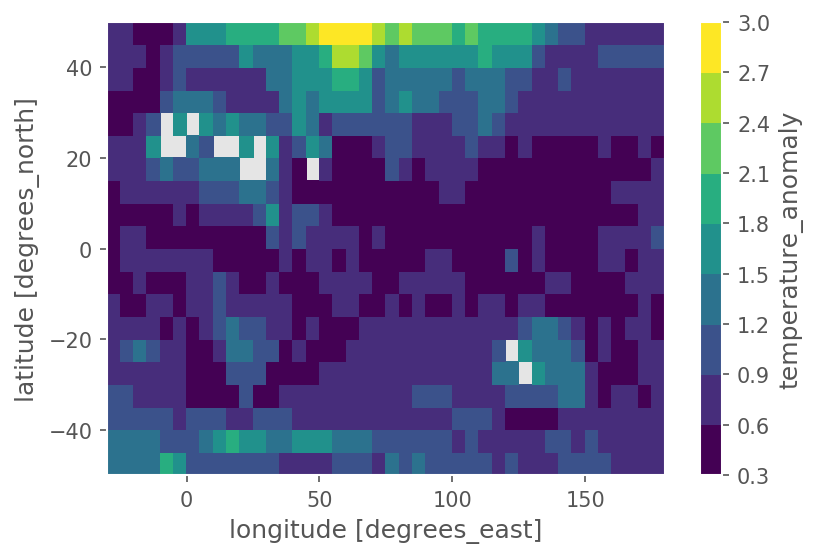

In [102]:
region.std(dim='time').plot(levels=10)

In [110]:
region = data['temperature_anomaly'].sel(latitude=slice(-60.,60),time=slice('2001','2012'))

Вспоминаем, что мы еще делали с dataframe в pandas

In [111]:
region.resample(time='Y')

Особая структура данных для которой мы можем использовать операции "понижения размерности"

In [125]:
regy = region.resample(time='Y').var(dim='time')

/opt/miniconda/envs/satocean/lib/python3.7/site-packages/xarray/core/nputils.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice.
  result = getattr(npmodule, name)(values, axis=axis, **kwds)


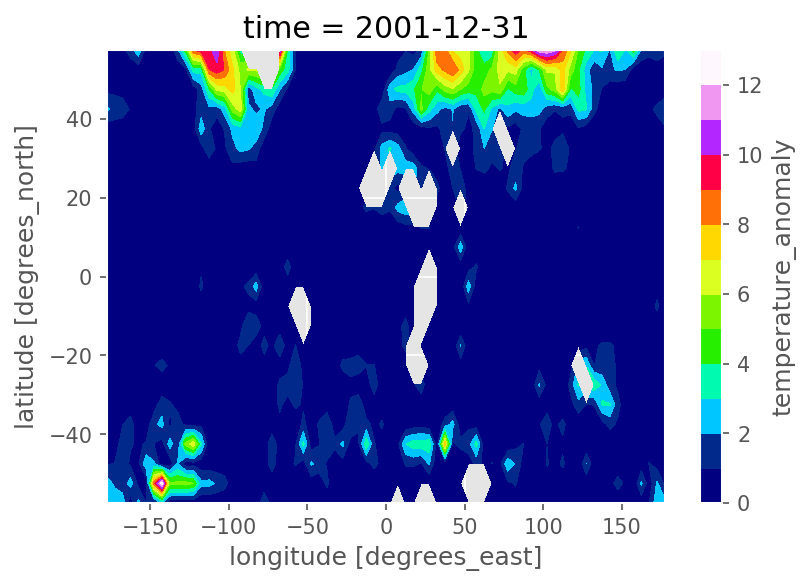

In [136]:
regy[0].plot.contourf(levels=15,cmap='gist_ncar')

Можно ли всё нарисовать на одной фигуре?

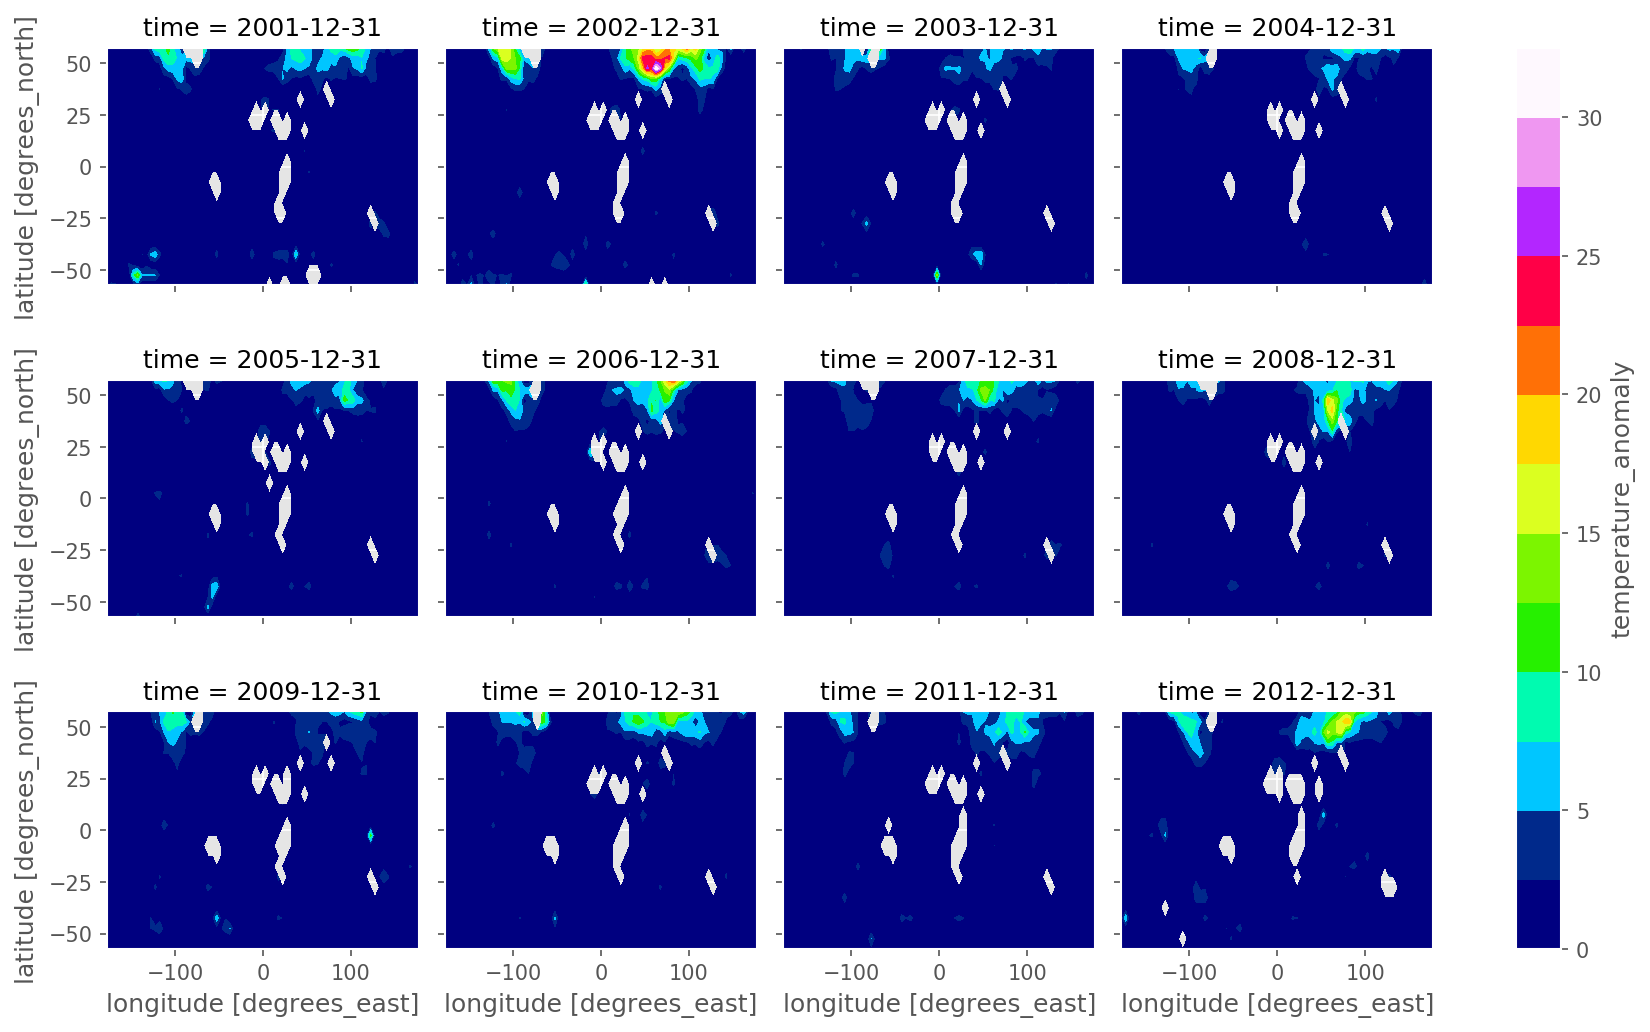

In [137]:
regy.plot.contourf(col='time',col_wrap=4,levels=15,figsize=(12,7),cmap='gist_ncar')

Очень длинная строка, но выполненная при этом работа не меньше...

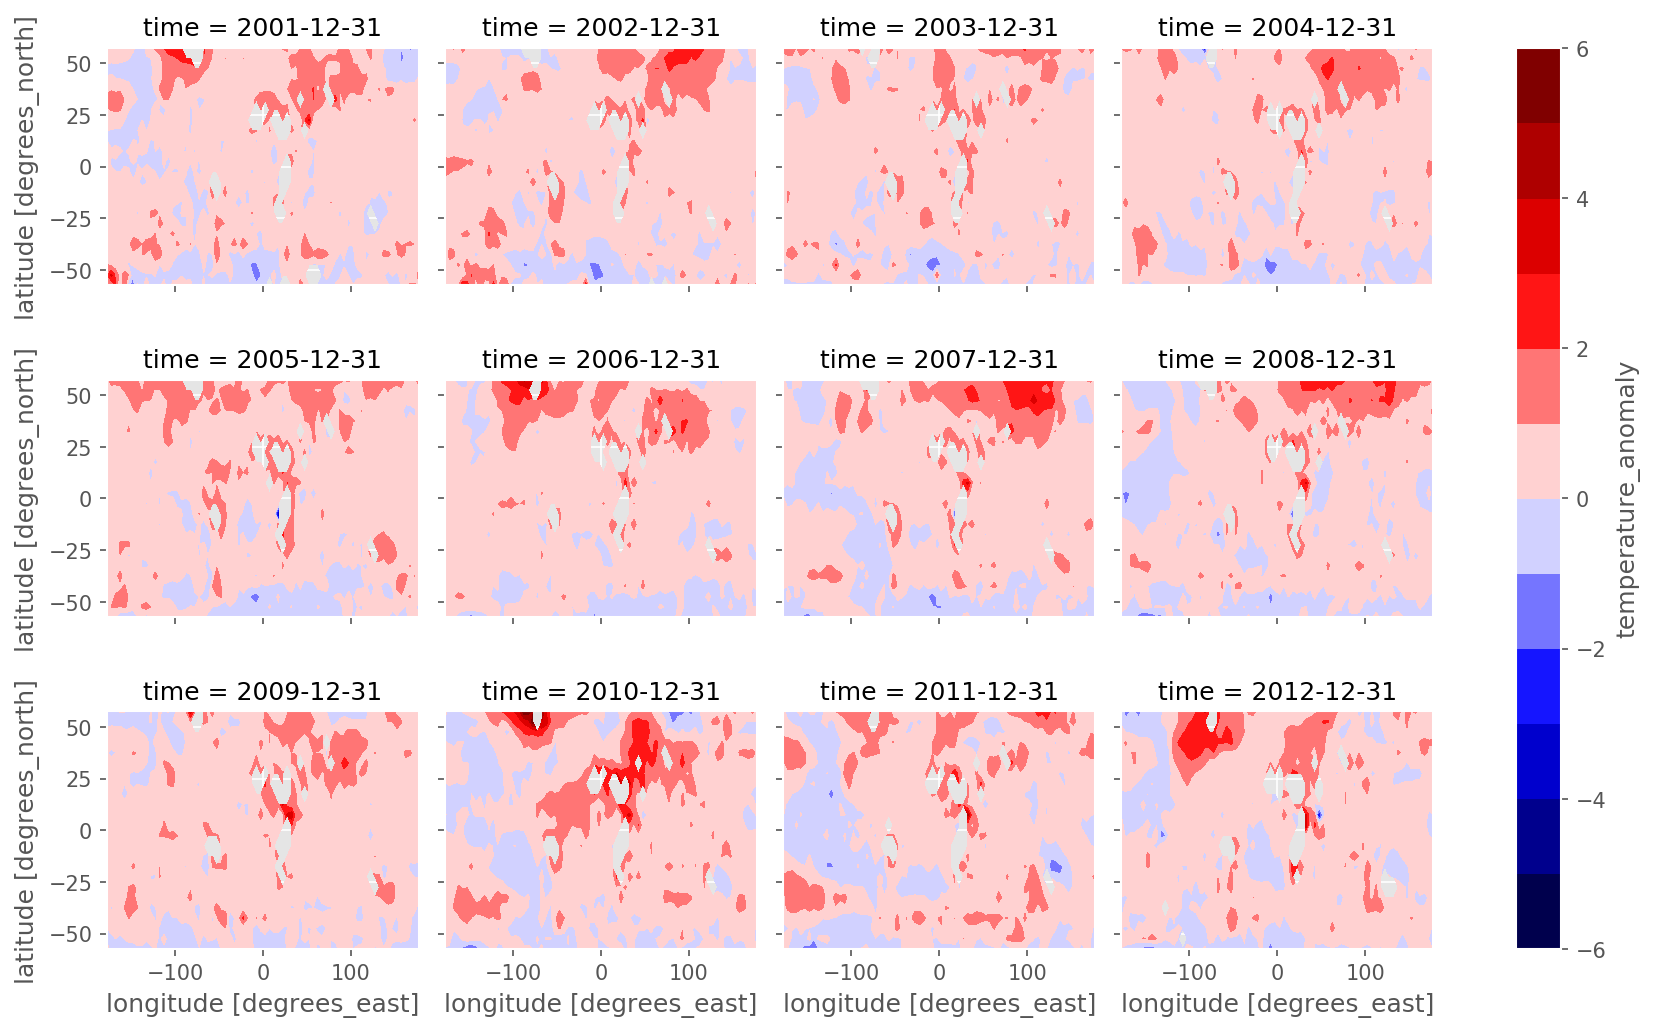

In [139]:
region.resample(time='Y').mean(dim='time').plot.contourf(col='time',col_wrap=4,levels=15,figsize=(12,7),cmap='seismic')